In [1]:
import numpy as np
import pandas as pd
from scipy.io import mmread
import matplotlib.pyplot as plt
from tifffile import imread
import os
from scipy.stats import zscore
from sklearn.metrics import pairwise_distances
from scipy.optimize import linear_sum_assignment
from scipy.stats import pearsonr, spearmanr
from tqdm import tqdm
import seaborn as sns
import pickle

In [2]:
# marker names for immune, tumor, and their overlap
immune_markers = ['DNA_1','CD3', 'PDL1', 'GRZB','Ki67', 'PanCK', 'CD45','CD68', 'CD3d', 'CD8a',
             'CD163', 'aSMA', 'CD14','CD4', 'FOXP3', 'PDL1_2','CD11b', 'pRB', 'PD1',
             'LaminABC', 'PDL1_3', 'LAG3','CD20', 'HLA_A', 'MHC_II_DPB1']
tumor_markers = ['DNA_1','CD3', 'pERK', 'Rad51','CCND1', 'Vimentin', 'aSMA','Ecad', 'ER', 'PR',
            'EGFR', 'pRB', 'HER2','Ki67', 'CD45', 'p21','CK14','CK19', 'CK17',
            'LaminABC', 'AR', 'H2Ax','PCNA','PanCK', 'CD31']
shared_markers = ['DNA_1','CD3','aSMA','pRB','PanCK','CD45','Ki67','LaminABC']

In [3]:
def ids_to_table(ids, table):
    match_table = table[table['CellID'].isin(ids)] # get relevant rows
    df1 = match_table.set_index('CellID')
    match_table = df1.reindex(ids) # set new table in correct order
    return match_table

def get_correlations(markers, immune_table, tumor_table):
    correlations = []
    for i,s in enumerate(markers):
        correlations.append(spearmanr(immune_table[s],tumor_table[s])[0])
    return correlations

In [4]:
cpath = '/home/groups/ChangLab/heussner/tma-integration/data/nuc_cell_tables'
core = 'B3'
tumor_all = pd.read_csv(os.path.join(cpath,f'{core}_tCyCIF_tumor_both.csv'))
immune_all = pd.read_csv(os.path.join(cpath,f'{core}_tCyCIF_immune_both.csv'))
corr_tracking = pd.read_csv(f'/home/groups/ChangLab/heussner/tma-integration/results/Cell_tracking_correlation/{core}.csv')
corr_tracking = corr_tracking[corr_tracking['tumor_id']>0]

In [5]:
imtbl = ids_to_table(corr_tracking['immune_id'], immune_all)
tmtbl = ids_to_table(corr_tracking['tumor_id'], tumor_all)

In [17]:
s1_x = np.array(imtbl['x'])
s2_x = np.array(tmtbl['x'])
import random
idx = random.sample(range(5000), 200)

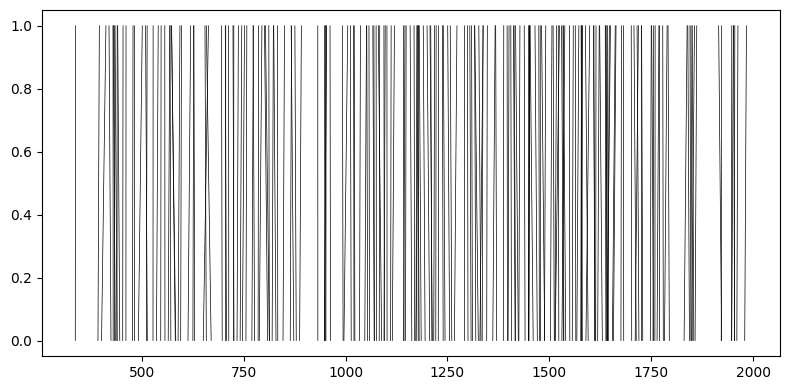

In [18]:
plt.figure(figsize=(8,4))
for x1,x2 in zip(s1_x[idx],s2_x[idx]):
    plt.plot([x1,x2],[0,1],color='black',linewidth=0.5)
plt.tight_layout()
plt.show()

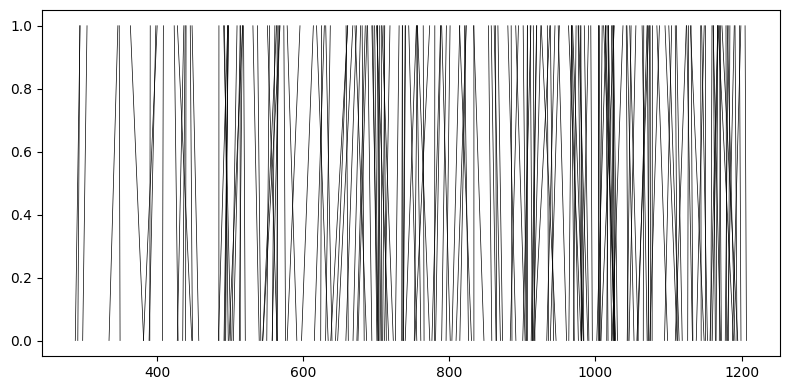

In [37]:
cpath = '/home/groups/ChangLab/heussner/tma-integration/data/nuc_cell_tables'
core = 'B3'
tumor_all = pd.read_csv(os.path.join(cpath,f'{core}_tCyCIF_tumor_both.csv'))
immune_all = pd.read_csv(os.path.join(cpath,f'{core}_tCyCIF_immune_both.csv'))
tracking = pd.read_csv(f'/home/groups/ChangLab/heussner/tma-integration/results/Linear_assignment_radius/{core}.csv')
tracking = tracking[tracking['tumor_id']>0]
imtbl = ids_to_table(tracking['immune_id'], immune_all)
tmtbl = ids_to_table(tracking['tumor_id'], tumor_all)
s1_x = np.array(imtbl['x'])
s2_x = np.array(tmtbl['x'])
import random
idx = random.sample(range(3000), 200)
plt.figure(figsize=(8,4))
for x1,x2 in zip(s1_x[idx],s2_x[idx]):
    plt.plot([x1,x2],[0,1],color='black',linewidth=0.5)
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
import pandas as pd
from scipy.io import mmread
import matplotlib.pyplot as plt
from tifffile import imread
import os
from scipy.stats import zscore
from sklearn.metrics import pairwise_distances
from scipy.optimize import linear_sum_assignment
from scipy.stats import pearsonr, spearmanr
from tqdm import tqdm
import seaborn as sns
import random
immune_markers = ['DNA_1','CD3', 'PDL1', 'GRZB','Ki67', 'PanCK', 'CD45','CD68', 'CD3d', 'CD8a',
             'CD163', 'aSMA', 'CD14','CD4', 'FOXP3', 'PDL1_2','CD11b', 'pRB', 'PD1',
             'LaminABC', 'PDL1_3', 'LAG3','CD20', 'HLA_A', 'MHC_II_DPB1']

tumor_markers = ['DNA_1','CD3', 'pERK', 'Rad51','CCND1', 'Vimentin', 'aSMA','Ecad', 'ER', 'PR',
            'EGFR', 'pRB', 'HER2','Ki67', 'CD45', 'p21','CK14','CK19', 'CK17',
            'LaminABC', 'AR', 'H2Ax','PCNA','PanCK', 'CD31']

shared_markers = ['DNA_1','CD3','aSMA','pRB','PanCK','CD45','Ki67','LaminABC']

core= 'B3'
# read tCyCIF data
#all cells tables
path = '/home/groups/ChangLab/heussner/tma-integration/data/nuc_cell_tables/'
tumor_all = pd.read_csv(os.path.join(path,f'{core}_tCyCIF_tumor_both.csv'))
immune_all = pd.read_csv(os.path.join(path,f'{core}_tCyCIF_immune_both.csv'))

# load matrices

immune = immune_all[shared_markers].copy()
tumor = tumor_all[shared_markers].copy()

tumor = zscore(tumor,axis=0)
immune = zscore(immune,axis=0)
#pearson correlation distance

cdist = 1 - spearmanr(a=immune,
                 b=tumor, 
                 axis=1)[0][0:len(immune),len(immune):len(immune)+len(tumor)]
#euclidean distance between target cells
cols = ['x','y']
tumor_spatial = tumor_all[cols].to_numpy()
sdist = pairwise_distances(tumor_spatial, tumor_spatial)

#matched_indexes = [tumor_all[tumor_all['CellID']==i].index for i in list(tracking['tumor_id'])]
dist = cdist.copy()

rows, cols = linear_sum_assignment(dist)
scores = np.array([cdist[i, j] for i, j in zip(rows, cols)])
matching = [list(immune_all['CellID']), [tumor_all['CellID'].iloc[c] for c in cols], scores]
table = pd.DataFrame(data={'immune_id':matching[0],'tumor_id':matching[1],'score':matching[2]})

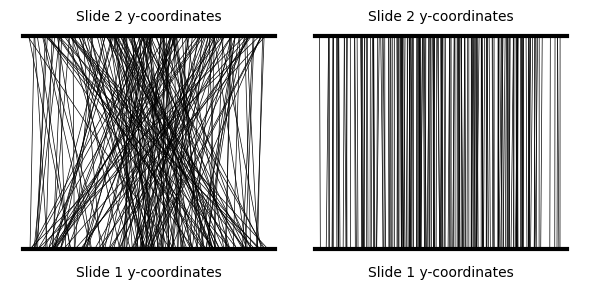

In [26]:
fig, ax = plt.subplots(1,2,figsize=(6,3))
tracking = table[table['tumor_id']>0]
imtbl = ids_to_table(tracking['immune_id'], immune_all)
tmtbl = ids_to_table(tracking['tumor_id'], tumor_all)
s1_x = np.array(imtbl['x'])
s2_x = np.array(tmtbl['x'])
idx = random.sample(range(12130), 200)
ax2 = ax[0].twiny()
min_1, max_1 = (int(np.min(s1_x)), int(np.max(s1_x)))
for x1,x2 in zip(s1_x[idx],s2_x[idx]):
    ax[0].plot([x1,x2],[0,1],color='black',linewidth=0.5)
ax[0].set_xticks([])
ax2.set_xticks([])
ax[0].set_yticks([])
ax2.set_yticks([])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax[0].set_xlabel('Slide 1 y-coordinates')
ax2.set_xlabel('Slide 2 y-coordinates')

tracking = pd.read_csv(f'/home/groups/ChangLab/heussner/tma-integration/results/Linear_assignment_radius/{core}.csv')
tracking = tracking[tracking['tumor_id']>0]
imtbl = ids_to_table(tracking['immune_id'], immune_all)
tmtbl = ids_to_table(tracking['tumor_id'], tumor_all)
s1_x = np.array(imtbl['x'])
s2_x = np.array(tmtbl['x'])
idx = random.sample(range(8221), 200)
ax3 = ax[1].twiny()
min_2, max_2 = (int(np.min(s1_x)), int(np.max(s1_x)))
for x1,x2 in zip(s1_x[idx],s2_x[idx]):
    ax[1].plot([x1,x2],[0,1],color='black',linewidth=0.5)
ax[1].set_xticks([])
ax3.set_xticks([])
ax[1].set_yticks([])
ax3.set_yticks([])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax[1].plot([min(min_1,min_2),max(max_1,max_2)],[0,0],linewidth=3,color='black')
ax[1].plot([min(min_1,min_2),max(max_1,max_2)],[1,1],linewidth=3,color='black')
ax[0].plot([min(min_1,min_2),max(max_1,max_2)],[0,0],linewidth=3,color='black')
ax[0].plot([min(min_1,min_2),max(max_1,max_2)],[1,1],linewidth=3,color='black')
ax[1].set_xlabel('Slide 1 y-coordinates')
ax3.set_xlabel('Slide 2 y-coordinates')
fig.tight_layout()
fig.savefig('spatial_comparison.png',dpi=600)
fig.show()